In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import integrate
from numpy import exp

In [89]:
#1.1先换算单位，来自CDIAC的排放单位是百万吨，为10^12g,文章中则为10^15g，CDIAC的查到的数据γ应先除以1000再除以2.13得到ppm单位的值
γ_CDIAC=np.array([5609,5755, 5968, 6088, 6151, 6239, 6178, 6172, 6284, 6422, 6550, 6663, 6638, 6584, 6750, 6916, 6981, 7397, 7782])
γ2=np.array([2130])
γ=γ_CDIAC/γ2
γ

array([2.63333333, 2.70187793, 2.80187793, 2.85821596, 2.88779343,
       2.92910798, 2.90046948, 2.89765258, 2.95023474, 3.01502347,
       3.07511737, 3.12816901, 3.11643192, 3.09107981, 3.16901408,
       3.24694836, 3.27746479, 3.47276995, 3.65352113])

In [72]:
from scipy.integrate import odeint
def model(y ,t):
    NA,NB = y
    k12 = 105/740
    k21 = 102/900
    gama = 2.63
    dydt = [-k12 * NA + k21 * NB + gama, k12 * NA - k21 * NB]
    return dydt
t = np.linspace(0,18,19)
y0=[ 347,423]

for i in range(0,18):
    gama=γ[i]
    y = odeint(model, y0, t)
    y
print (y)

[[347.         423.        ]
 [348.31405983 424.31594017]
 [349.5951882  425.6648118 ]
 [350.85080547 427.03919453]
 [352.08665182 428.43334818]
 [353.30718477 429.84281523]
 [354.51585357 431.26414643]
 [355.7153081  432.6946919 ]
 [356.90766042 434.13233958]
 [358.09449747 435.57550253]
 [359.2770592  437.0229408 ]
 [360.45630904 438.47369096]
 [361.63299185 439.92700815]
 [362.80768616 441.38231384]
 [363.98084138 442.83915862]
 [365.1528034  444.2971966 ]
 [366.32384034 445.75615966]
 [367.49416131 447.21583869]
 [368.66392729 448.67607271]]


In [79]:
#buffer_effect是一个用NA 值套娃得到的值，先算出1986年的
buffer_effect1 = 3.69 + 1.86 * 0.01 * 347 -1.80 * 0.000001 * 347*347
buffer_effect1 

9.927463800000002

In [82]:
#1.2 N02的值为821，转化为ppm为385,buffer_effect=0.44
def model(y, t):
    NA,NB = y
    k12 = 105/740
    k21 = 102/900
    N02 = 385
    gama =2.63
    buffer_effect =9.92
    dydt = [-k12 * NA + k21 *(N02 + buffer_effect*(NB-N02)) + 2.63, k12 * NA - k21 * (N02 + buffer_effect*(NB-N02))]
    return dydt
t = np.linspace(0,18,19)
y0=[347,423]

for i in range(0,18):
    gama=γ[i]
    buffer_effect= 3.69 + 1.86 * 0.01 * y[i,1] -1.80 * 0.000001 * y[i,1]*y[i,1]
    y = odeint(model, y0, t)
    y
print (y)

[[347.         423.        ]
 [370.55402924 402.07597076]
 [378.87113701 396.38886299]
 [382.89276091 394.99723909]
 [385.70343382 394.81656618]
 [388.17272507 394.97727493]
 [390.54577642 395.23422358]
 [392.89169732 395.51830268]
 [395.22996974 395.81003026]
 [397.56608588 396.10391412]
 [399.90159352 396.39840648]
 [402.23693004 396.69306996]
 [404.57221883 396.98778117]
 [406.90749337 397.28250663]
 [409.24276424 397.57723576]
 [411.5780341  397.8719659 ]
 [413.91330379 398.16669621]
 [416.24857324 398.46142676]
 [418.58384261 398.75615739]]


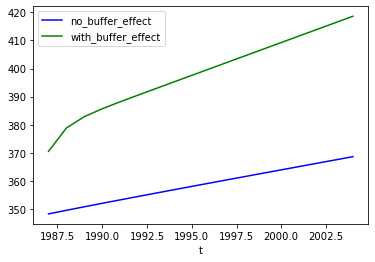

In [88]:
t=np.array([1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004])
y1=np.array([348.31405983,349.5951882,350.85080547,352.08665182 ,353.30718477 ,354.51585357 ,355.7153081  ,356.90766042 ,
                 358.09449747,359.2770592  ,360.45630904 ,361.63299185 ,362.80768616 ,363.98084138 ,365.1528034,
                 366.32384034,367.49416131,368.66392729])
y2=np.array([370.55402924,378.87113701,382.89276091,385.70343382,388.17272507,390.54577642,392.89169732,
              395.22996974,397.56608588,399.90159352,402.23693004,404.57221883,406.90749337,409.24276424,
              411.5780341,413.91330379,416.24857324,418.58384261])
import matplotlib.pyplot as plt
plt.plot(t,y1 , 'b', label='no_buffer_effect')
plt.plot(t,y2, 'g', label='with_buffer_effect')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()
